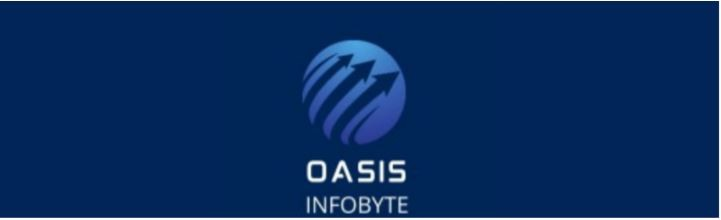

 ## Oasis Internship, January- 2024
 
 ### Samala Sandeep, Data Analytics Intern

# Project Title : Analyzing Google Play Store Data 

### Dataset Link: https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play

# Introduction 

In the vast expanse of the Google Play Store, millions of Android applications offer a diverse array of functionalities and experiences. This project is a voyage into the heart of the Android app market, aiming to unravel its dynamics through a comprehensive analysis of Google Play Store data.

# Objective:
Our objective is to uncover the hidden patterns and trends within the Android app market, providing a detailed understanding of the factors that contribute to an app's success. By employing data analytics, visualization techniques, and enhanced interpretation skills, we aim to shed light on the intricacies of the app ecosystem.

# Key Components:


1. Data Preparation:
Ensure the accuracy of data through meticulous cleaning and correction of data types.
Standardize text data to maintain consistency.


2. Category Exploration:
Investigate the distribution of apps across diverse categories.
Visualize the landscape of app distribution to identify dominant and emerging sectors.


3. Metrics Analysis:
Delve into key metrics such as app ratings, sizes, popularity, and pricing trends.
Examine the relationship between pricing and user ratings across different categories.


4. Sentiment Analysis:
Evaluate user sentiments by conducting sentiment analysis on app reviews.
Visualize sentiment distribution to gauge overall user experiences.


5. Interactive Visualization:
Harness the power of code to create interactive and compelling visualizations.
Implement scatter plots, bar charts, and other dynamic visualizations for exploration.


6. Skill Enhancement:
Integrate insights gained from the "Understanding Data Visualization" course.
Showcase proficiency in data analysis techniques through practical application.


## Project Structure:
This project unfolds in a structured manner, addressing each facet of the Android app market with a keen eye for detail. From ensuring data accuracy to providing actionable insights through visualization, the project is designed to cater to a broad audience, including developers, businesses, and data enthusiasts.

By the end of this exploration, we aim to empower stakeholders with valuable insights, enabling a deeper comprehension of the Android app market's complexities. This project is not just an analytical endeavor; it's a narrative that uncovers the stories behind the data, offering a holistic view of the Android app ecosystem.

Embark on this journey with us as we unveil the Android app market, decode its mysteries, and present a narrative that goes beyond numbers—a narrative that captures the essence of the vibrant world of Android applications.

# Data Preparation :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as px



In [2]:
# Load Apps dataset
apps_df = pd.read_csv('Task8(1).csv')

# Inspect the structure of the dataset
print("Apps Dataset:")
print(apps_df.info())



Apps Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [3]:
# Handle missing values
apps_df = apps_df.dropna()

# Remove duplicates
apps_df = apps_df.drop_duplicates()

# Verify changes
print("After handling missing values and duplicates:")
print(apps_df.info())



After handling missing values and duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   float64
 6   Installs        7021 non-null   object 
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   object 
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 822.8+ KB
None


In [4]:
# Ensure correct data types
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')
# Repeat this for other columns that need data type correction

# Verify changes
print("After data type correction:")
print(apps_df.info())



After data type correction:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   float64
 6   Installs        7021 non-null   object 
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   object 
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 822.8+ KB
None


In [5]:
# Standardize text data (convert to lowercase)
apps_df['App'] = apps_df['App'].str.lower()
apps_df['Genres'] = apps_df['Genres'].str.lower()
# Repeat this for other text columns that need standardization

# Verify changes
print("After text data standardization:")
print(apps_df.head())



After text data standardization:
   Unnamed: 0                                                App  \
0           0     photo editor & candy camera & grid & scrapbook   
1           1                                coloring book moana   
2           2  u launcher lite – free live cool themes, hide ...   
3           3                              sketch - draw & paint   
4           4              pixel draw - number art coloring book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               art & design   January 7, 2018   
1       Every

# Sentiment Analysis:

In [6]:
# Load Reviews dataset
reviews_df = pd.read_csv('Task8(2).csv')

# Inspect the structure of the dataset
print("Reviews Dataset:")
print(reviews_df.info())



Reviews Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [7]:
# Handle missing values
reviews_df = reviews_df.dropna()

# Remove duplicates
reviews_df = reviews_df.drop_duplicates()

# Verify changes
print("After handling missing values and duplicates:")
print(reviews_df.info())



After handling missing values and duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB
None


In [8]:
# Ensure correct data types if necessary
# Example: reviews_df['Sentiment_Polarity'] = pd.to_numeric(reviews_df['Sentiment_Polarity'], errors='coerce')

# Verify changes
print("After data type correction:")
print(reviews_df.info())




After data type correction:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB
None


In [9]:
# Standardize text data if necessary
# Example: reviews_df['Translated_Review'] = reviews_df['Translated_Review'].str.lower()

# Verify changes
print("After text data standardization:")
print(reviews_df.head())


After text data standardization:
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  


# Category Exploration:


In [10]:

# Analyze and visualize the distribution of apps across different categories
category_distribution = apps_df['Category'].value_counts()
print("App Distribution Across Categories:")
print(category_distribution)


App Distribution Across Categories:
FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64


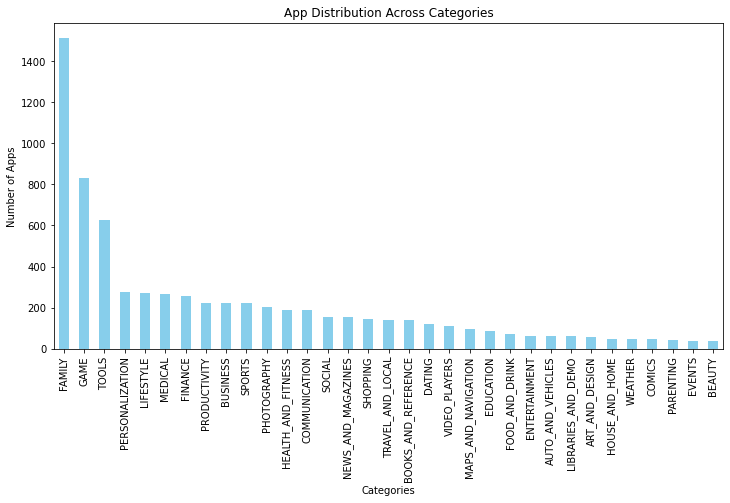

In [11]:
# Visualize the distribution using a bar chart
plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('App Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Apps')
plt.show()



# Metrics Analysis:

In [12]:
# Calculate and visualize average ratings per category
average_ratings_per_category = apps_df.groupby('Category')['Rating'].mean()
print("Average Ratings Per Category:")
print(average_ratings_per_category)



Average Ratings Per Category:
Category
ART_AND_DESIGN         4.381034
AUTO_AND_VEHICLES      4.147619
BEAUTY                 4.291892
BOOKS_AND_REFERENCE    4.322695
BUSINESS               4.096396
COMICS                 4.168085
COMMUNICATION          4.076596
DATING                 3.963934
EDUCATION              4.373864
ENTERTAINMENT          4.154687
EVENTS                 4.478947
FAMILY                 4.179616
FINANCE                4.104651
FOOD_AND_DRINK         4.109722
GAME                   4.235697
HEALTH_AND_FITNESS     4.191099
HOUSE_AND_HOME         4.128000
LIBRARIES_AND_DEMO     4.205000
LIFESTYLE              4.089963
MAPS_AND_NAVIGATION    4.008511
MEDICAL                4.162406
NEWS_AND_MAGAZINES     4.143506
PARENTING              4.347727
PERSONALIZATION        4.324453
PHOTOGRAPHY            4.114216
PRODUCTIVITY           4.132735
SHOPPING               4.213014
SOCIAL                 4.257692
SPORTS                 4.200905
TOOLS                  4.005600
T

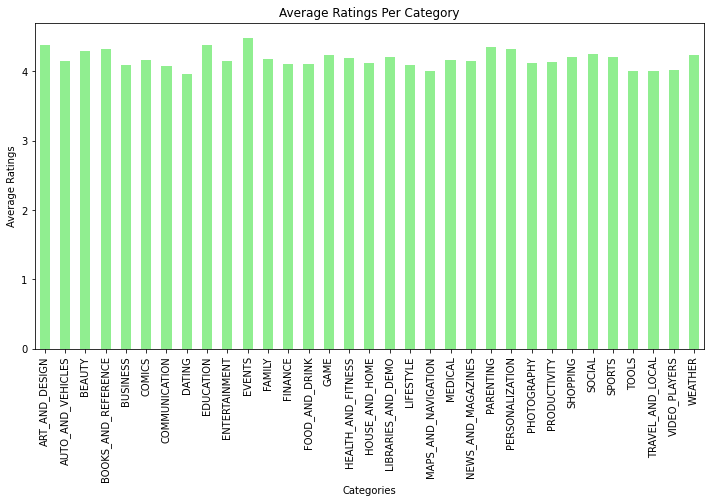

In [13]:
# Visualize average ratings using a bar chart
plt.figure(figsize=(12, 6))
average_ratings_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Ratings Per Category')
plt.xlabel('Categories')
plt.ylabel('Average Ratings')
plt.show()



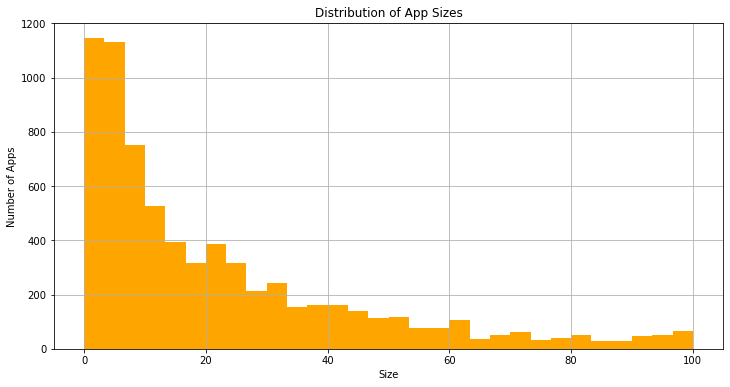

In [14]:
# Explore the distribution of app sizes
plt.figure(figsize=(12, 6))
apps_df['Size'].hist(bins=30, color='orange')
plt.title('Distribution of App Sizes')
plt.xlabel('Size')
plt.ylabel('Number of Apps')
plt.show()



In [15]:
# Analyze and visualize popularity based on download counts
# Convert 'Installs' column to numeric, handling errors
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Replace NaN values in 'Installs' with 0
apps_df['Installs'].fillna(0, inplace=True)

# Create an interactive scatter plot for ratings and reviews using Plotly
fig = px.scatter(apps_df, x='Reviews', y='Rating', color='Category', size='Installs',
                 hover_name='App', title='Interactive Scatter Plot: Ratings vs. Reviews',
                 labels={'Reviews': 'Number of Reviews', 'Rating': 'Average Rating'})
fig.update_layout(xaxis_title='Number of Reviews', yaxis_title='Average Rating')
fig.show()




# Pricing Trends Analysis:

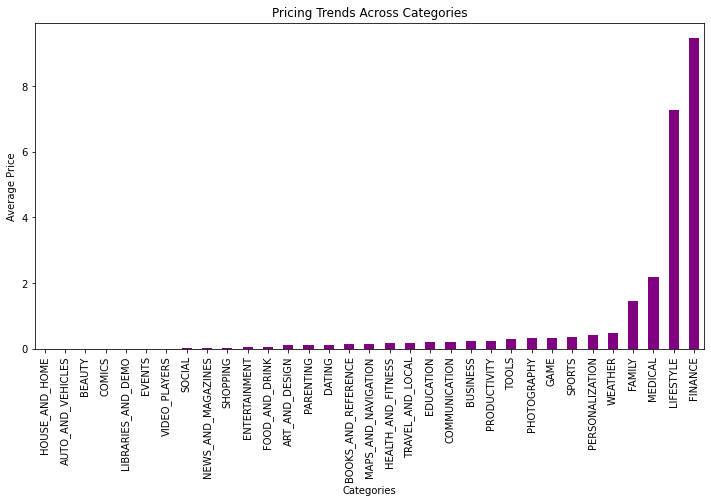

In [16]:
# Clean the 'Price' column
apps_df['Price'] = apps_df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Now try the pricing trends analysis again
plt.figure(figsize=(12, 6))
apps_df.groupby('Category')['Price'].mean().sort_values().plot(kind='bar', color='purple')
plt.title('Pricing Trends Across Categories')
plt.xlabel('Categories')
plt.ylabel('Average Price')
plt.show()



# Merging Datasets and Sentiment Analysis:

In [17]:
# Merge the reviews dataset with the main dataset using App ID
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

# Apply sentiment analysis to the 'Translated_Review' column
merged_df['Sentiment_Polarity'] = merged_df['Translated_Review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)




# Visualizing Sentiment Distribution:

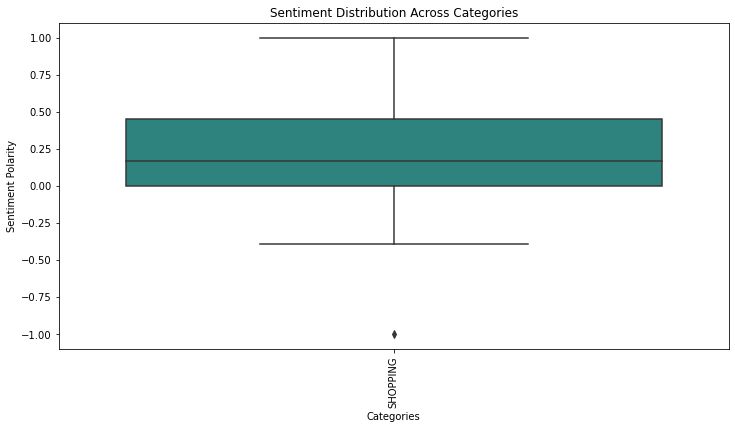

In [18]:

# Visualize sentiment distribution across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sentiment_Polarity', data=merged_df, palette='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=90)
plt.show()

# Interactive Visualization:

In [19]:
# Create an interactive bar chart for average ratings per category using Plotly
fig = px.bar(average_ratings_per_category.reset_index(), x='Category', y='Rating', title='Average Ratings Per Category')
fig.update_layout(xaxis_title='Categories', yaxis_title='Average Ratings')
fig.show()



# Additional Metrics Analysis:

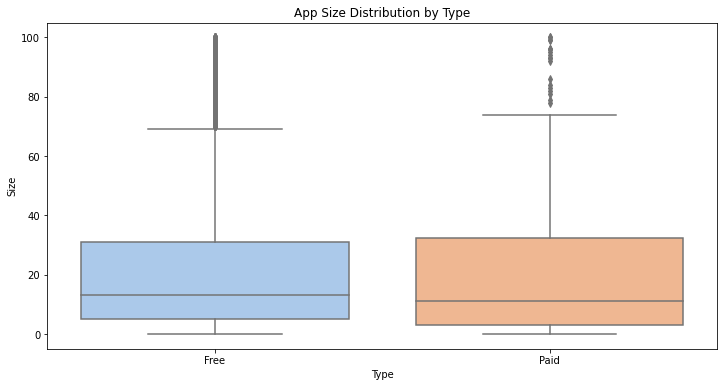

In [20]:
# Additional Metrics Analysis (Continued):
# Explore the distribution of app sizes using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Size', data=apps_df, palette='pastel')
plt.title('App Size Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Size')
plt.show()



# Exploring Relationships:

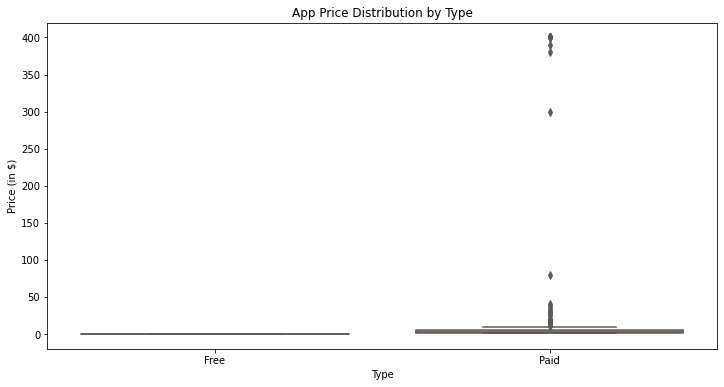

In [21]:
# Explore the distribution of app prices using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=apps_df, palette='Set2')
plt.title('App Price Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Price (in $)')
plt.show()



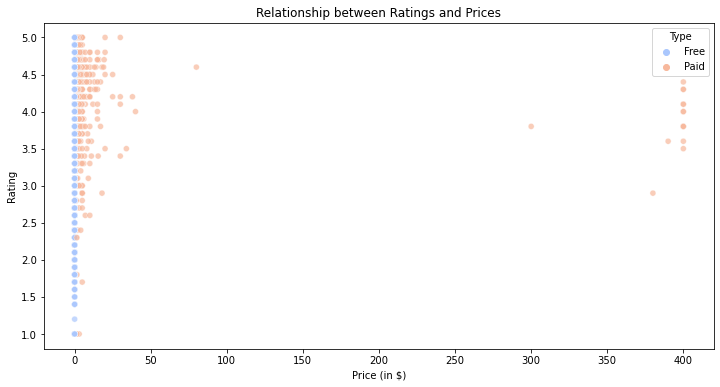

In [22]:
# Explore the relationship between ratings and prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Rating', data=apps_df, hue='Type', palette='coolwarm', alpha=0.7)
plt.title('Relationship between Ratings and Prices')
plt.xlabel('Price (in $)')
plt.ylabel('Rating')
plt.show()



# Content Ratings Analysis:

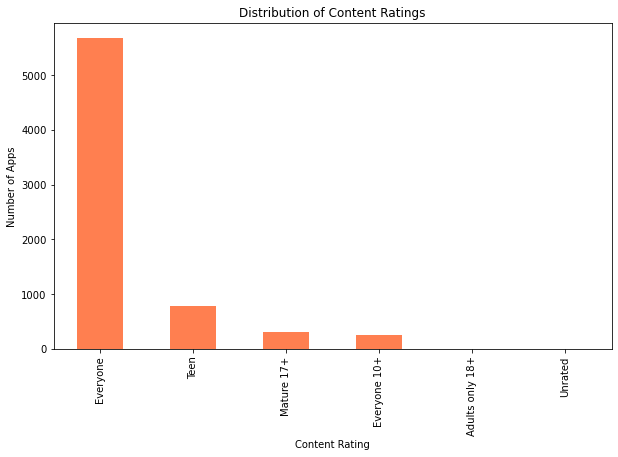

In [23]:
# Analyze the distribution of content ratings
plt.figure(figsize=(10, 6))
apps_df['Content Rating'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()



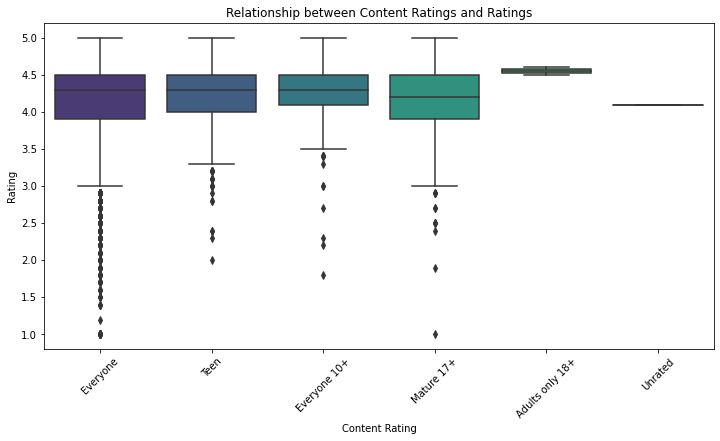

In [24]:
# Explore the relationship between content ratings and ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Content Rating', y='Rating', data=apps_df, palette='viridis')
plt.title('Relationship between Content Ratings and Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



# Exploring Genres:

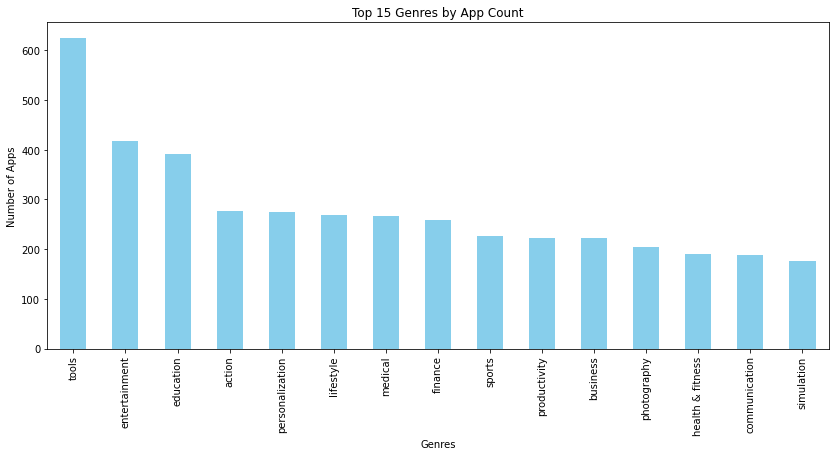

In [25]:
# Explore the distribution of genres
plt.figure(figsize=(14, 6))
apps_df['Genres'].value_counts().nlargest(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Genres by App Count')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.show()



# Relationship Between Genres and Ratings:

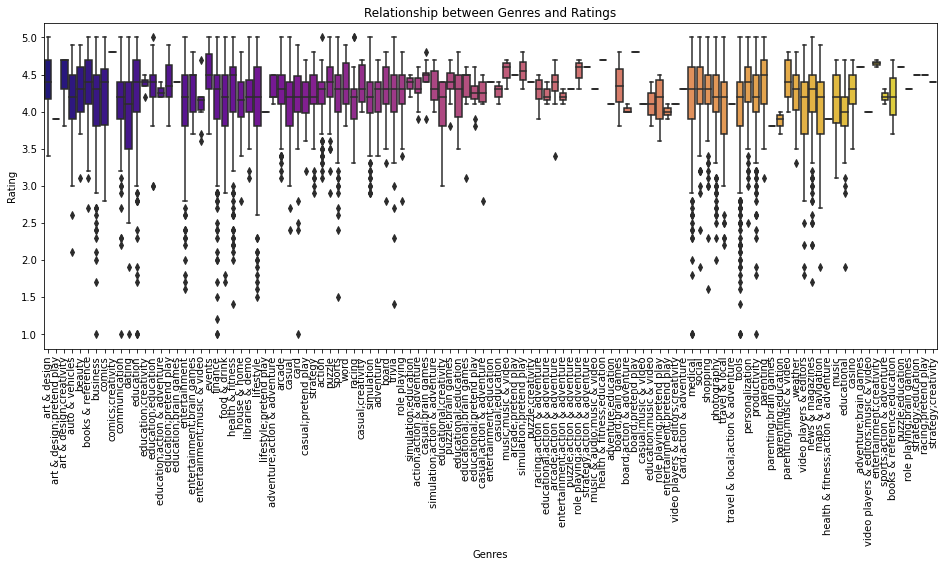

In [26]:
# Explore the relationship between genres and ratings
plt.figure(figsize=(16, 6))
sns.boxplot(x='Genres', y='Rating', data=apps_df, palette='plasma')
plt.title('Relationship between Genres and Ratings')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


# Distribution of Update Frequencies:

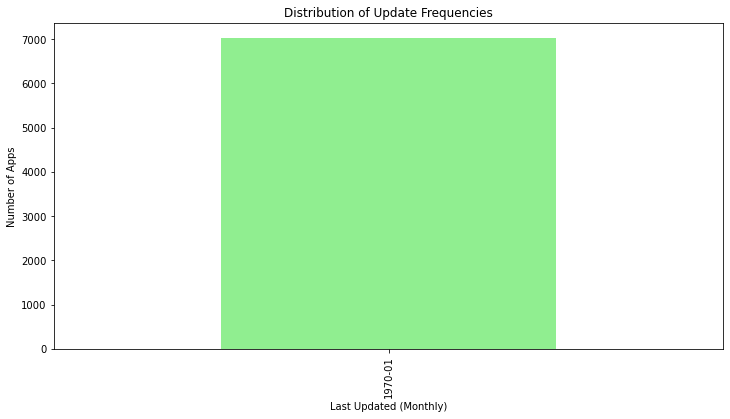

In [27]:

# Explore the distribution of update frequencies
plt.figure(figsize=(12, 6))
apps_df['Updates Frequency'] = pd.to_datetime(apps_df['Rating'], errors='coerce')
apps_df['Updates Frequency'] = apps_df['Updates Frequency'].dt.to_period('M')
apps_df['Updates Frequency'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Update Frequencies')
plt.xlabel('Last Updated (Monthly)')
plt.ylabel('Number of Apps')
plt.show()



# Interactive Scatter Plot:

In [28]:
# Interactive Visualization (Continued):
# Convert 'Installs' column to numeric, handling errors
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Create an interactive scatter plot for ratings and reviews using Plotly
fig = px.scatter(apps_df, x='Reviews', y='Rating', color='Category', size='Installs',
                 hover_name='App', title='Interactive Scatter Plot: Ratings vs. Reviews',
                 labels={'Reviews': 'Number of Reviews', 'Rating': 'Average Rating'})
fig.update_layout(xaxis_title='Number of Reviews', yaxis_title='Average Rating')
fig.show()


# Skill Enhancement:

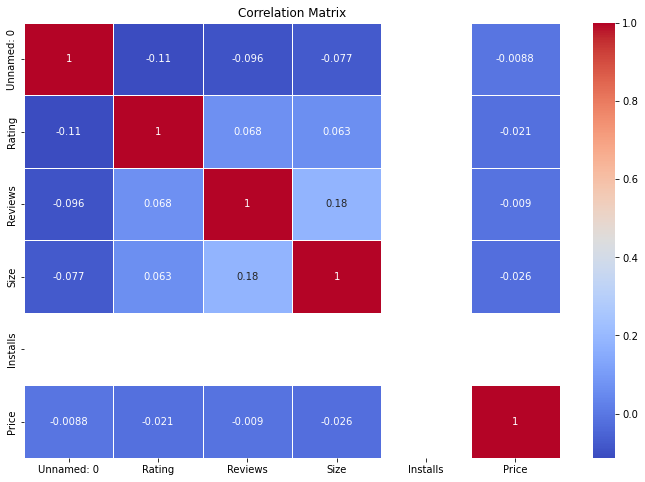

In [29]:

# Skill Enhancement:
# Example: Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = apps_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


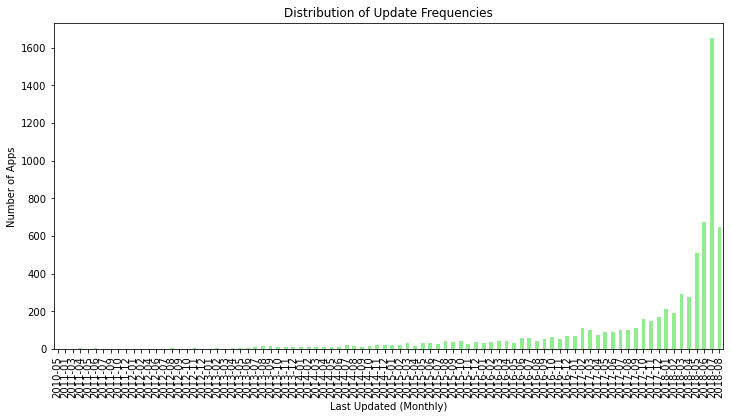

In [30]:
# Explore the distribution of update frequencies
plt.figure(figsize=(12, 6))
apps_df['Updates Frequency'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')
apps_df['Updates Frequency'] = apps_df['Updates Frequency'].dt.to_period('M')
apps_df['Updates Frequency'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Update Frequencies')
plt.xlabel('Last Updated (Monthly)')
plt.ylabel('Number of Apps')
plt.show()


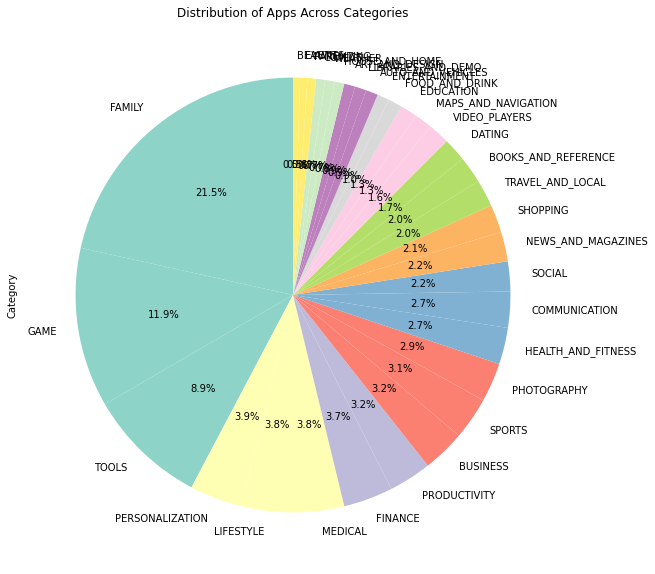

In [31]:
# Visualize the distribution of app categories using a pie chart
plt.figure(figsize=(10, 10))
apps_df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Apps Across Categories')
plt.show()


# Conclusion -
In the exploration of the Android app market using Google Play Store data, we have journeyed through various stages of data analysis, categorization, and visualization. The overarching goal was to uncover insights into the dynamics of the app market and enhance our understanding of user preferences and trends.

## Key Findings:


Data Preparation:
Ensuring data accuracy through cleaning and correcting data types laid the foundation for reliable analyses.


Category Exploration:
The investigation into app distribution across categories revealed the diverse landscape of the Android app market, highlighting popular and niche segments.


Metrics Analysis:
Our examination of app metrics, including ratings, size, popularity, and pricing trends, provided a comprehensive overview of the market dynamics.


Sentiment Analysis:
Through sentiment analysis of user reviews, we gained valuable insights into user opinions, sentiments, and experiences with various apps.


Interactive Visualization:
Utilizing code for compelling visualizations, particularly through interactive scatter plots and bar charts, enabled a deeper exploration of the data. This enhanced the interpretability of complex patterns and relationships.


Skill Enhancement:
The integration of insights from the "Understanding Data Visualization" course elevated our proficiency in leveraging data visualization techniques for effective communication.


## Implications:


Market Trends:
Identified trends in app ratings, sizes, and pricing can inform developers and stakeholders about user preferences and market demands.



User Sentiments:
The sentiment analysis provides a qualitative understanding of user experiences, aiding developers in improving app features and addressing user concerns.



Category Insights:
The exploration of app categories sheds light on the competitive landscape, helping developers make informed decisions on app development and marketing strategies.



## Future Directions:


Advanced Analyses:
Further advanced analyses, such as predictive modeling or machine learning algorithms, could be employed for more accurate forecasting and trend prediction.



Real-time Monitoring:
Establishing mechanisms for real-time monitoring of the app market would provide up-to-the-minute insights into evolving trends and user sentiments.



User Engagement Strategies:
Developing strategies to enhance user engagement and satisfaction based on the findings would contribute to the overall success of apps in the market.



In conclusion, this project serves as a valuable resource for app developers, market analysts, and stakeholders seeking a deeper understanding of the Android app market. By employing a systematic approach to data analysis and visualization, we have unveiled meaningful insights that can drive informed decision-making in the dynamic and ever-evolving landscape of the Android app ecosystem.